In [28]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [93]:
background_dark = True
if background_dark:
    plt.style.use('dark_background')

In [29]:
def rfun(m, n, r):
    """
    radial factor of Zernike polynomial
    :param m:
    :param n:
    :param r:
    :return:
    """

    R = np.zeros(r.shape)
    if (n-m)%2 == 0:
        for s in range((n-abs(m))//2+1):
            R += r**(n-2*s) * (-1)**s * factorial(n-s) /\
                (factorial(s) * factorial((n+m)//2-s) * factorial((n-m)//2-s))

    return R

In [30]:
def OSAindex(m, n):
    j = (n*(n+2) + m)/2

    return j

In [31]:
def zernike(r, theta, m, n):
    """

    :param r: radial distance
    :param theta: azimuthal angle
    :param m: azimuthal
    :param n: radial
    :return: zernike polynomials z and OSA and ANSI standard convention j
    """

    if m == 0:
        z = np.sqrt((n+1)/np.pi) * rfun(m,n,r)
    elif m > 0:
        z = np.sqrt(2*(n+1)/np.pi) * rfun(m,n,r) * np.cos(m*theta)
    else:
        z = np.sqrt(2*(n+1)/np.pi) * rfun(m,n,r) * np.sin(m*theta)

    zer = z * (r<=1)
    j = OSAindex(m,n)

    return zer, j

In [32]:
def cart2pol(x, y):

    z = x + y*1j

    return np.abs(z), np.angle(z)

In [87]:
r = np.hstack((np.linspace(1.,1.,128), np.linspace(1.,0.,128)))
g = np.hstack((np.linspace(0.,1.,128), np.linspace(1.,0.,128)))
b = np.hstack((np.linspace(0.,1.,128), np.linspace(1.,1.,128)))
cdict = np.vstack((r,g,b)).T

cmap_name = 'zernike'
BR1 = LinearSegmentedColormap.from_list(cmap_name, cdict)

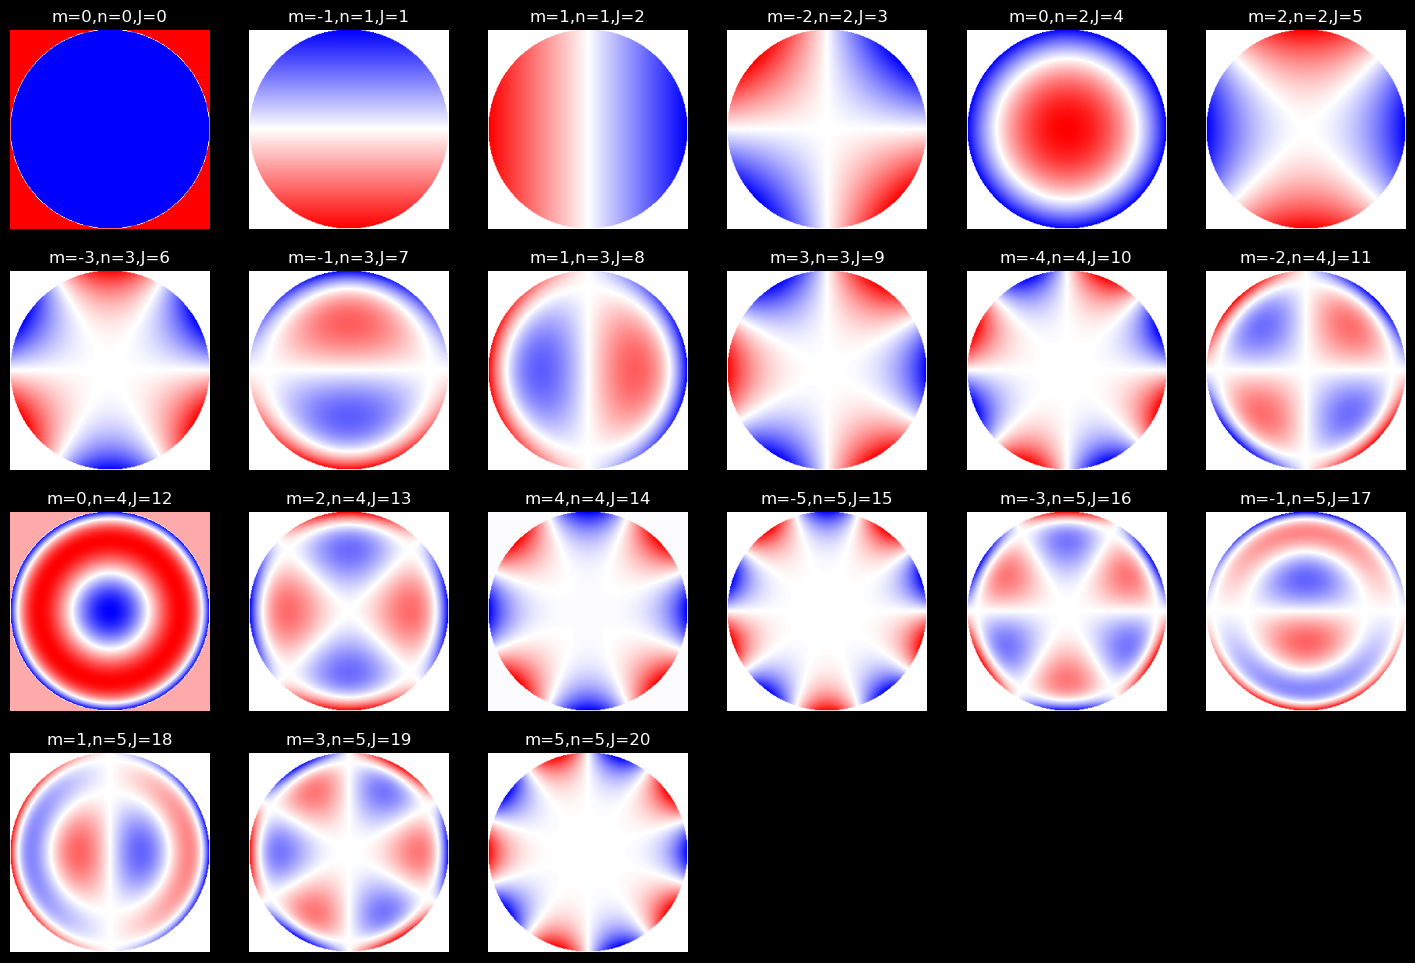

In [105]:
N = 2**8
x = np.linspace(-1,1,N)
dx = x[1] - x[2]
X, Y = np.meshgrid(x, x)
r, theta = cart2pol(X, Y)

z = []
i = 0
fig, axes = plt.subplots(4,6,figsize=(18,12))
for n in range(6):
    for m in range(-n, n+1, 2):
        temp, J = zernike(r, theta, m ,n)
        z.append(temp)
        axes.flat[i].imshow(temp,cmap=BR1)
        axes.flat[i].set_title('m=%i,n=%i,J=%i'%(m,n,J))
        i += 1
for ax in axes.flat:
    ax.axis('off')

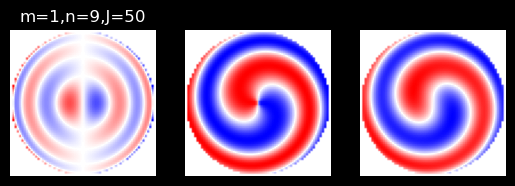

In [116]:
N = 2**6
x = np.linspace(-1,1,N)
dx = x[2] - x[1]
X, Y = np.meshgrid(x,x)
r, theta = cart2pol(X, Y)

f = np.cos(theta - 2*np.pi * (X**2 + Y**2)) * (r<=1)
f_E = np.zeros(r.shape)
for n in range(11):
    for m in range(-n,n,2):
        temp, J = zernike(r, theta, m, n)
        c = sum(sum(temp*f)) * dx**2
        f_E += c*temp
        if J == 50:
            break
    else:
        continue
    break

fig, ax = plt.subplots(1,3)
ax[0].imshow(temp,cmap=BR1)
ax[0].set_title('m=%i,n=%i,J=%i'%(m,n,J))
ax[1].imshow(f,cmap=BR1)
ax[2].imshow(f_E,cmap=BR1)
for a in ax:
    a.axis('off')